In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
np.random.seed(24)

In [2]:
def conflict(board):
    n = board.shape[-1]
    row_frequency = [0] * n
    main_diag_frequency = [0] * (2 * n)
    secondary_diag_frequency = [0] * (2 * n)

    for i in range(n):
        row_frequency[board[i]] += 1
        main_diag_frequency[board[i] + i] += 1
        secondary_diag_frequency[n - board[i] + i] += 1

    conflicts = 0
    # formula: (N * (N - 1)) / 2
    for i in range(2*n):
        if i < n:
            conflicts += (row_frequency[i] * (row_frequency[i]-1)) / 2
        conflicts += (main_diag_frequency[i] * (main_diag_frequency[i]-1)) / 2
        conflicts += (secondary_diag_frequency[i]
                      * (secondary_diag_frequency[i]-1)) / 2
    return int(conflicts)

In [3]:
def fitness_fn(board):
    return 1 + (28-conflict(board))

In [4]:
sample_sol =np.array([1,3,5,7,2,0,6,4])
fitness_fn(sample_sol)

29

In [5]:
def init_population():
    random_val = np.random.randint(8)
    list_population = [np.ones(8, dtype=int)*random_val for i in range (60)]
    return np.stack(list_population, axis=0)

In [6]:
def random_selection(population, fitness_fn, size=1):
    weights = [fitness_fn(board) for board in population]
    probs = [weight/sum(weights) for weight in weights]
    indices = np.random.choice([i for i in range(len(population))], size=size, p=probs)
#     print(indices)
    population = np.array(population)
    return population[indices]
    

In [7]:
orig_population = init_population()
(orig_population.shape)

(60, 8)

In [8]:
def reproduce(x, y):
    slice_idx = np.random.randint(8)
    new_guy = np.array(x[:int(slice_idx)])
    return np.append(new_guy , np.array(y[int(slice_idx):]))

In [9]:
def mutate(x):
    if np.random.rand()<0.1:
        x[np.random.randint(8)] = np.random.randint(8)
    return x

In [10]:
fitnesses =[]

In [11]:
len(orig_population)

60

In [12]:
for i in range(600):    
    new_population=[]
    for i in range(len(orig_population)):
        x = random_selection(orig_population, fitness_fn)
        y = random_selection(orig_population, fitness_fn)
        new_guy = reproduce(x, y)
        new_guy = mutate(new_guy)
        new_population.append(new_guy)
    orig_population= new_population
    fitnesses.append(np.mean(np.array([fitness_fn(board) for board in new_population])))

26.15


2.5573304217098087

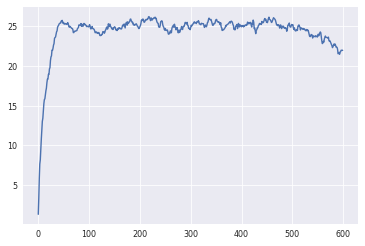

In [13]:
sns.set_context("paper")
plt.plot(fitnesses)
print(max(fitnesses))
np.std(fitnesses)

26.85


1.9761143124935021

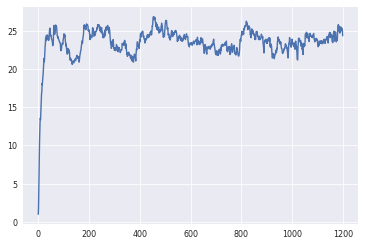

In [16]:
sns.set_context("paper")
plt.plot(fitnesses)
print(max(fitnesses))
np.std(fitnesses)

29


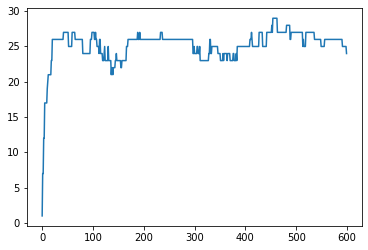

In [13]:
plt.plot(fitnesses)
print(max(fitnesses))

29


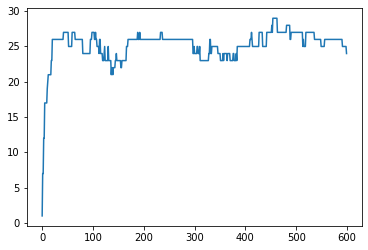

In [13]:
plt.plot(fitnesses)
print(max(fitnesses))

28


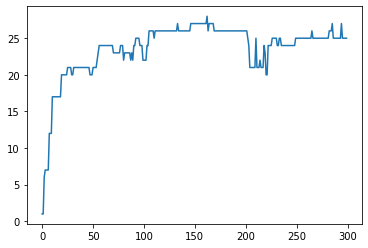

In [12]:
plt.plot(fitnesses)
print(max(fitnesses))

28


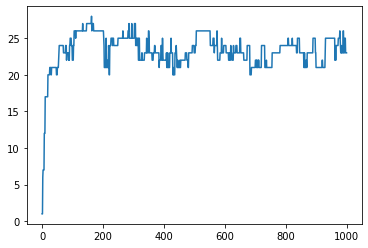

In [12]:
plt.plot(fitnesses)
print(max(fitnesses))

27


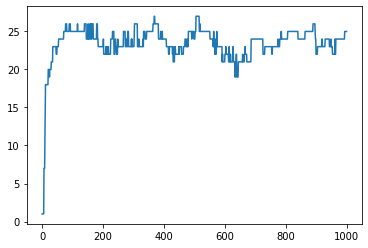

In [24]:
plt.plot(fitnesses)
print(max(fitnesses))

26.0


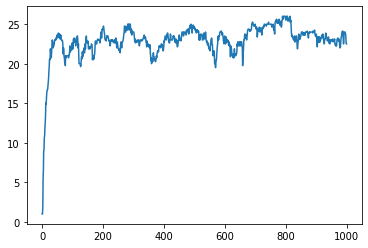

In [11]:
plt.plot(fitnesses)
print(max(fitnesses))

25.875


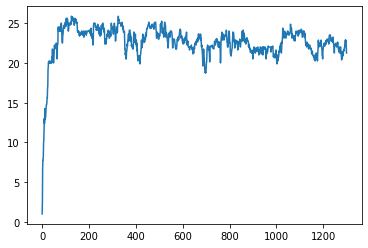

In [19]:
plt.plot(fitnesses)
print(max(fitnesses))

In [ ]:
arrays = [np.random.randn(3, 4) for _ in range(1)]
print(arrays)
np.stack(arrays, axis=0).shape

In [ ]:
s = np.random.randn(3, 10)
print(s.shape)

In [ ]:
# N Queens
"""
pick a population (Done)

repeat

    new_population = {}


    for i in range(size_of_population):
        X = get random board
        Y = get random board
        
        

until convergence

"""